## Sharpen image using unsharp mask.

### Preparation 
We first install kornia

In [1]:
%%capture
%matplotlib inline
!pip install kornia

In [2]:
import kornia
kornia.__version__

'0.5.2'

In [3]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

Downloading the example image.

In [4]:
!wget -q https://github.com/kornia/data/raw/main/squirrel.jpg

In [5]:
#Read the image with OpenCV
img: np.ndarray = cv2.imread('squirrel.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
#convert image to tensor
data: torch.tensor = kornia.image_to_tensor(img, keepdim=False)
data = data.float() / 255

We create Unsharp Mask filter object and apply it to data 
- The unsharp mask filter is initialized with the format kornia.filters.UnsharpMask(kernel_size, sigma)
- kernel_size: Tuple[int, int]
- sigma: Tuple[int,int]
- You can tune these parametres and experiment!

In [7]:
sharpen=kornia.filters.UnsharpMask((9,9), (2.5,2.5))
sharpened_tensor=sharpen(data)
difference=sharpened_tensor-data

In [8]:
#Converting the sharpened tensor to image
sharpened_image=kornia.tensor_to_image(sharpened_tensor) 
difference_image=kornia.tensor_to_image(difference)

So, let us understand how we arrived till here.
- In the unsharp mask technique, first a gaussian blur is applied to the data.
- Then the blur is subtracted from the orignal data.
- The resultant is added to the origanl data.
- So, what do we get? Sharpened data!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


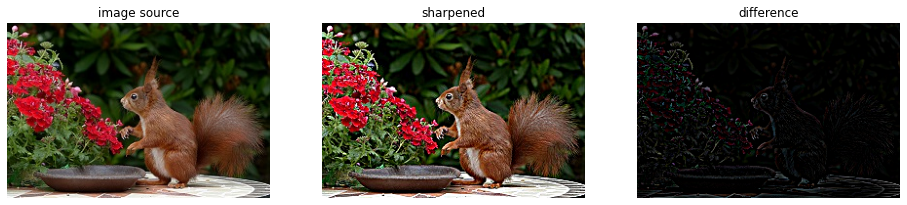

In [9]:
#To display the input image, sharpened image and the difference image
fig, axs = plt.subplots(1,3, figsize=(16,10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('sharpened')
axs[1].imshow(sharpened_image)

axs[2].axis('off')
axs[2].set_title('difference')
axs[2].imshow(difference_image)
pass